<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/KNN_with_Classified_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

KNN stands for K nearest neighbors. 

**The idea behind KNN**: the label of our target is determined by the labels of the n data points that are nearest to it. For example, when k = 5, we would get the labels of the nearest 5 data points. Let's say we have labels, T, T, T, F, and F, then, the label of the target is T. Because we have 3 Ts and only 2 Fs. 

**How to choose K value**

Use trial and error to find a K-value that works the best for the dataset.


# Example

## 1. Import libraries and dataset

In [35]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/XiaonaZhou/data_analytics_2/main/Python/Unit_4/classified.csv')

In [37]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [38]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [39]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## 2. Standardize the dataset

**Why**: Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters.  

Any variables that are on a large scale will have a much larger effect on the distance between the observations, and also on the KNN model, than variables that are on a small scale.


* Plot some of the features to confirm that our data needs standardization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

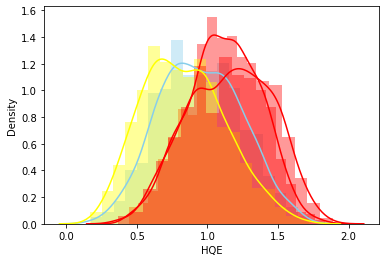

In [40]:
sns.distplot( df["WTT"] , color="skyblue")
sns.distplot( df["PTI"] , color="red")
sns.distplot( df["EQW"] , color="yellow")
sns.distplot( df["HQE"] , color="red")

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(df.drop('TARGET CLASS', axis=1)) # standardize the dataset without the label. DO NOT standardize label

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1)) # column names were removed after standardize
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [45]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # add back column names

In [46]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Density plot after standardization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

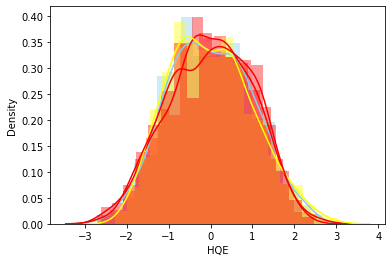

In [47]:
sns.distplot( df_feat["WTT"] , color="skyblue")
sns.distplot( df_feat["PTI"] , color="red")
sns.distplot( df_feat["EQW"] , color="yellow")
sns.distplot( df_feat["HQE"] , color="red")

#EDA


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


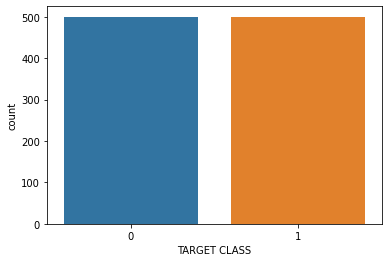

In [48]:
sns.countplot(df['TARGET CLASS'])

The dataset is well balanced since it has an equal number of instances in each class.

## 3. Split dataset into training set and testing set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30, random_state=101)

## 4. Modeling with KNN



In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1) # try k = 1

In [53]:
knn.fit(x_train, y_train) # fitting the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
pred = knn.predict(x_test) # make prediction on test data 

# 5. Evaluation

Check confusion matrix to evaluate our model.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(confusion_matrix(y_test, pred))# check confusion ma

[[151   8]
 [ 15 126]]


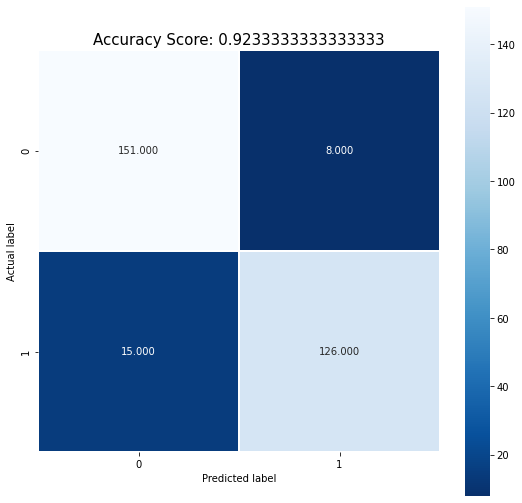

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Interpretation of `classification_report`**:

- Since the dataset is well balanced, the acuuracy score is a good measure to evaluate the model. We have an accuracy of 0.92, which means we correctly identify 92% of the data points. 


- The **recall** means the percent of "caught" positive instance: $\frac{TP}{(TP+FN)}$. For all the data points that are classified as certain classes, we correctly identified 92% of them. In other words, we missed 8% of the true value.  

- The **precision** will be "how many are correctly classified among that class": $\frac{TP}{TP+FP}$. That is among all the ones we classified as true, 92% was actually true. 

-  The **f1-score** is the harmonic mean between precision & recall. Check [harmonic mean](https://www.mathsisfun.com/numbers/harmonic-mean.html). 

- The support is the number of occurrences of the given class in your dataset (so you have 164 of class 0 and 136 of class 1, which is a really well-balanced dataset.

-  precision and recall is highly used for imbalanced dataset because, in a highly imbalanced dataset, a 99% accuracy can be meaningless.

[source](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)


1. **Prioritise recall over precision** in the cases where we don't want to have any false negative because false-negative cause more damage. We want to avoid misclassified positive cases as negative. One example would be COVID 19 test, we don't want to miss any COVID patient, that is we don't want any false negative since the virus is contagious. We don't want any COVID patient to be classified as healthy and go out spread the virus more.

2. **Prioritise precision over recall** in the cases where we don't want to have any false positive because false-positive cause more damage. We want to avoid misclassified negative cases as positive. For example, for cancer testing, we don't want to classify any healthy people as cancer patients and have them go through cancer treatments that destroy their immune system.  



From the report, we see that all the scores are above 0.9. That means we have a decent model. 

## 6. Test out different K values 

Accuracy score

In [59]:
from sklearn import metrics
score =[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9233333333333333, 0.91, 0.95, 0.93, 0.9433333333333334, 0.95, 0.9333333333333333, 0.94, 0.95, 0.9433333333333334, 0.9466666666666667, 0.9533333333333334, 0.95, 0.9433333333333334, 0.9433333333333334, 0.95, 0.95, 0.9533333333333334, 0.95, 0.9466666666666667, 0.95, 0.95, 0.9366666666666666, 0.9433333333333334, 0.9433333333333334, 0.95, 0.95, 0.9533333333333334, 0.94, 0.95, 0.9433333333333334, 0.9533333333333334, 0.9466666666666667, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.9533333333333334, 0.9566666666666667, 0.95]


Text(0, 0.5, 'Testing Accuracy')

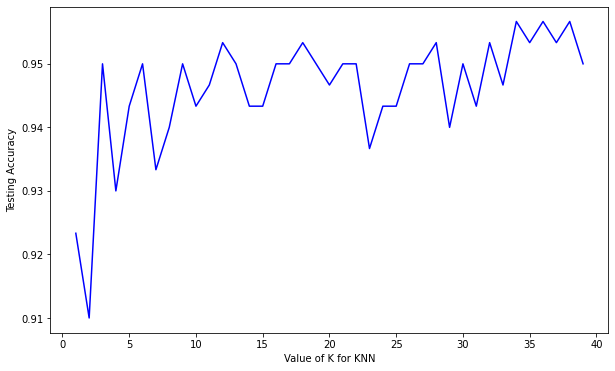

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),score, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Error rate')

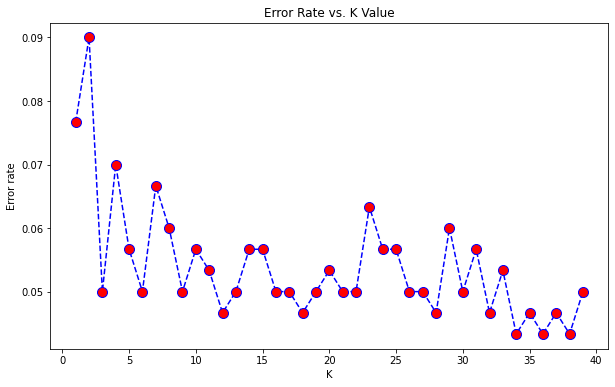

In [61]:
error_rate = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle= 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

From the graph, we see that k=34 gives the lowest error rate. However, we may want to pick K = 3 as our best choice. The error rate was below 0.05 when K = 3, so it may not be worth to go all the way to K = 34 for such a slight improvement. Note: Picking K value is a trade-off between run-time and accuracy. When time is more valuable, we would want to pick a lower K value with similar performance. 

Compare K = 3 and K =34 

In [62]:
knn = KNeighborsClassifier(n_neighbors=3) # try k = 3 now
knn.fit(x_train, y_train) # fitting the model
pred = knn.predict(x_test) # make prediction on test data 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [63]:
knn = KNeighborsClassifier(n_neighbors=34) # try k = 34 now
knn.fit(x_train, y_train) # fitting the model
pred = knn.predict(x_test) # make prediction on test data 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



As expected, the score only went up 0.01 when I changed K value from 3 to 34.

# Conclusion

1. Using KNN model, I was able to predict the class with 0.96 accuracy score.
2. Picking the right K value is crucial. When accuracy overrides run-time, we want to choose the K value that gives the lowest error rate. In contrast, when time is more valuable, the question becomes trickier. We must find the right balance between time and accuracy.  